# Read all log.txt

In [1]:
import glob
import pandas as pd
from pandas.core.common import flatten
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = "D:/Dev/ReinforcementLearning/results/CartPole-v1/"

In [3]:
logs = glob.glob(path + "/*/*/*.txt")

In [4]:
def read_file(path):
    values = []
    col = path.split("\\")[-2].split("_")
           
    with open(path, "r") as file:
        for i in file.readlines():
            values.append([path.split("\\")[-3],*col,*i.split("\n")[0].split(",")])
    return values

In [5]:
columns = ["algo","step_train","batch_size", "gamma", "greedy_exploration","network","", "optimizer", "lr", "memories", "max_size", "step", "max", "min", "avg", "sum"]

In [6]:
df = pd.DataFrame([], columns = columns)
for file in logs:
    ite = pd.DataFrame(read_file(file), columns = columns)
    df = pd.concat([df,ite],  ignore_index=True)

# Result

In [7]:
df.head(10)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,max,min,avg,sum
0,CategoricalDQN,1,32,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,2048,1,1.0,1.0,1.0,10.0
1,CategoricalDQN,1,32,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,2048,100,1.0,1.0,1.0,10.0
2,CategoricalDQN,1,32,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,2048,200,1.0,1.0,1.0,10.0
3,CategoricalDQN,1,32,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,2048,300,1.0,1.0,1.0,84.0
4,CategoricalDQN,1,32,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,512,1,1.0,1.0,1.0,11.0
5,CategoricalDQN,1,32,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,512,100,1.0,1.0,1.0,11.0
6,CategoricalDQN,1,32,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,512,200,1.0,1.0,1.0,10.0
7,CategoricalDQN,1,32,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,512,300,1.0,1.0,1.0,10.0
8,CategoricalDQN,1,32,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.001,ExperienceReplay,2048,1,1.0,1.0,1.0,11.0
9,CategoricalDQN,1,32,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.001,ExperienceReplay,2048,100,1.0,1.0,1.0,9.0


## Sort by sum and step

In [8]:
for c in ["step_train", "batch_size", "gamma", "lr", "step", "max", "min", "avg", "sum"]:
    df[c] = df[c].astype(float)
for c in df.columns:
    if df[c].dtypes  == "object":
        df[c] = df[c].astype('category')

In [9]:
df.sort_values(by =["sum","step"],  ascending = [False, True]).head(10)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,max,min,avg,sum
697,CategoricalDQN,32.0,32.0,0.99,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,C51Network,,Adam,0.0001,ExperienceReplay,2048,100.0,1.0,1.0,1.0,500.0
1165,DoubleDQN,1.0,32.0,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,512,100.0,1.0,1.0,1.0,500.0
3465,DQN,1.0,32.0,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,2048,100.0,1.0,1.0,1.0,500.0
3517,DQN,1.0,32.0,0.95,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,512,100.0,1.0,1.0,1.0,500.0
3565,DQN,1.0,32.0,0.95,EpsilonGreedy-0.1,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,512,100.0,1.0,1.0,1.0,500.0
3637,DQN,1.0,32.0,0.95,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.0010,ExperienceReplay,512,100.0,1.0,1.0,1.0,500.0
3657,DQN,1.0,32.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,2048,100.0,1.0,1.0,1.0,500.0
3661,DQN,1.0,32.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,512,100.0,1.0,1.0,1.0,500.0
3705,DQN,1.0,32.0,0.99,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,2048,100.0,1.0,1.0,1.0,500.0
3805,DQN,1.0,32.0,0.99,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,512,100.0,1.0,1.0,1.0,500.0


## Correlation matrix

In [10]:
df_corr = df.copy()

In [11]:
for c in df_corr.columns:
    try:
        df_corr[c] = df_corr[c].cat.codes
    except:
        pass

In [12]:
df_corr.corr()["sum"]

algo                  0.050287
step_train           -0.302233
batch_size            0.007836
gamma                 0.000314
greedy_exploration    0.041557
network               0.066268
                           NaN
optimizer                  NaN
lr                   -0.169936
memories                   NaN
max_size             -0.022018
step                  0.199688
max                        NaN
min                        NaN
avg                        NaN
sum                   1.000000
Name: sum, dtype: float64

<AxesSubplot:>

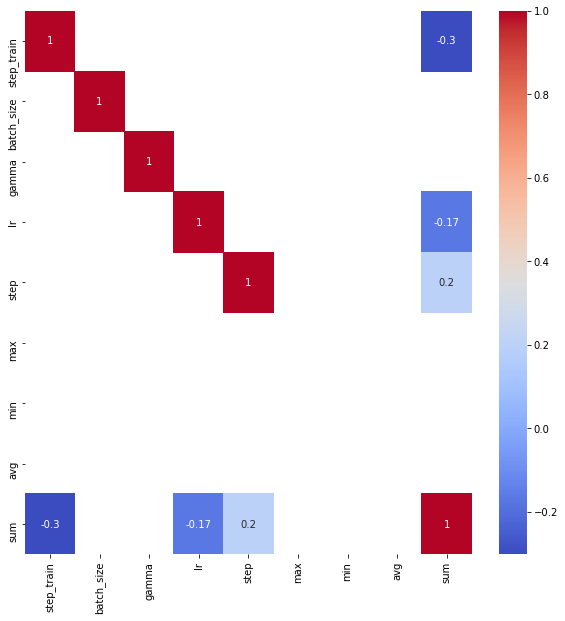

In [13]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df.corr()[abs(df.corr()) > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

## Correlation matrix for best result

In [14]:
df_corr_best = df_corr[df_corr["sum"] >= 300]

<AxesSubplot:>

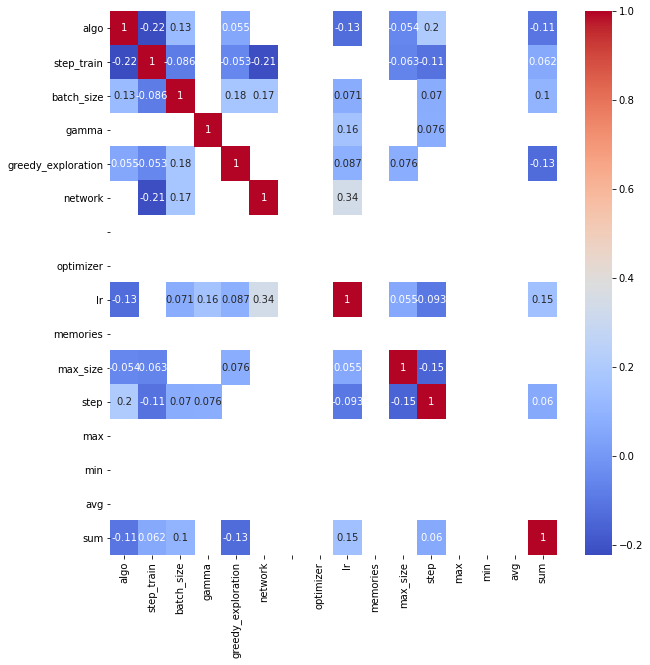

In [15]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df_corr_best.corr()[abs(df_corr_best.corr()) > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

# Result by algo

### DQN

#### SimpleNetwork

In [31]:
df_DQN = df[df["algo"] == "DQN"].copy()
df_DQN = df_DQN[df_DQN["network"] == "SimpleNetwork"]

In [32]:
df_DQN.sort_values(by =["sum","step"],  ascending = [False, True]).head(50)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,max,min,avg,sum
3637,DQN,1.0,32.0,0.95,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.0010,ExperienceReplay,512,100.0,1.0,1.0,1.0,500.0
3873,DQN,1.0,32.0,1.00,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleNetwork,,Adam,0.0010,ExperienceReplay,2048,100.0,1.0,1.0,1.0,500.0
4025,DQN,1.0,32.0,1.00,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.1000,ExperienceReplay,2048,100.0,1.0,1.0,1.0,500.0
4257,DQN,1.0,64.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleNetwork,,Adam,0.0010,ExperienceReplay,2048,100.0,1.0,1.0,1.0,500.0
4317,DQN,1.0,64.0,0.99,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleNetwork,,Adam,0.1000,ExperienceReplay,512,100.0,1.0,1.0,1.0,500.0
4505,DQN,1.0,64.0,1.00,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleNetwork,,Adam,0.1000,ExperienceReplay,2048,100.0,1.0,1.0,1.0,500.0
4022,DQN,1.0,32.0,1.00,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.0010,ExperienceReplay,512,200.0,1.0,1.0,1.0,500.0
4026,DQN,1.0,32.0,1.00,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.1000,ExperienceReplay,2048,200.0,1.0,1.0,1.0,500.0
4114,DQN,1.0,64.0,0.95,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleNetwork,,Adam,0.0010,ExperienceReplay,2048,200.0,1.0,1.0,1.0,500.0
4258,DQN,1.0,64.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleNetwork,,Adam,0.0010,ExperienceReplay,2048,200.0,1.0,1.0,1.0,500.0


<AxesSubplot:>

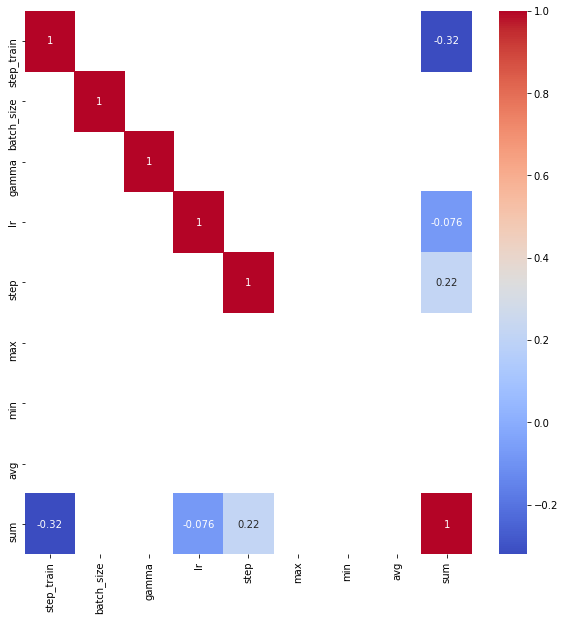

In [18]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df_DQN.corr()[abs(df_DQN.corr()) > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

#### DuelingNetwork

In [19]:
df_DQN = df[df["algo"] == "DQN"].copy()
df_DQN = df_DQN[df_DQN["network"] == "SimpleDuelingNetwork"]

In [20]:
df_DQN.sort_values(by =["sum","step"],  ascending = [False, True]).head(20)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,max,min,avg,sum
3465,DQN,1.0,32.0,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,2048,100.0,1.0,1.0,1.0,500.0
3517,DQN,1.0,32.0,0.95,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,512,100.0,1.0,1.0,1.0,500.0
3565,DQN,1.0,32.0,0.95,EpsilonGreedy-0.1,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,512,100.0,1.0,1.0,1.0,500.0
3657,DQN,1.0,32.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,2048,100.0,1.0,1.0,1.0,500.0
3661,DQN,1.0,32.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,512,100.0,1.0,1.0,1.0,500.0
3705,DQN,1.0,32.0,0.99,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,2048,100.0,1.0,1.0,1.0,500.0
3805,DQN,1.0,32.0,0.99,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,512,100.0,1.0,1.0,1.0,500.0
4041,DQN,1.0,64.0,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,2048,100.0,1.0,1.0,1.0,500.0
4185,DQN,1.0,64.0,0.95,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,2048,100.0,1.0,1.0,1.0,500.0
4281,DQN,1.0,64.0,0.99,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,2048,100.0,1.0,1.0,1.0,500.0


<AxesSubplot:>

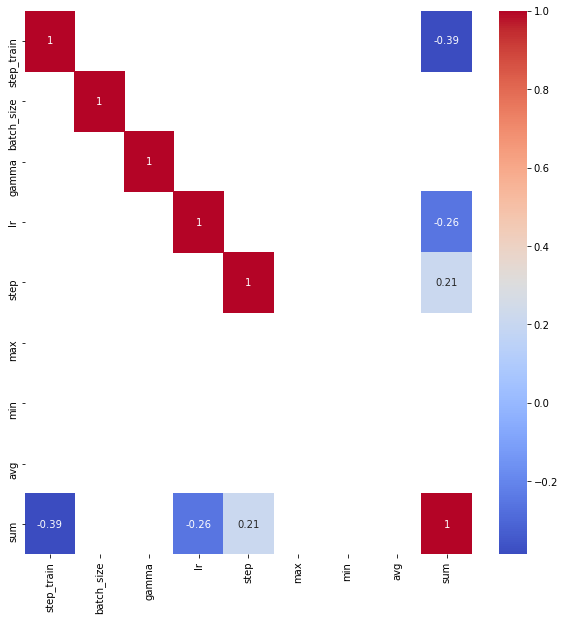

In [21]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df_DQN.corr()[abs(df_DQN.corr()) > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

### DoubleDQN

#### SimpleNetwork

In [22]:
df_DoubleDQN = df[df["algo"] == "DoubleDQN"].copy()
df_DoubleDQN = df_DoubleDQN[df_DoubleDQN["network"] == "SimpleNetwork"]

In [23]:
df_DoubleDQN.sort_values(by =["sum","step"],  ascending = [False, True]).head(10)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,max,min,avg,sum
1954,DoubleDQN,1.0,64.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleNetwork,,Adam,0.0010,ExperienceReplay,2048,200.0,1.0,1.0,1.0,500.0
2290,DoubleDQN,1.0,64.0,1.00,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.0010,ExperienceReplay,2048,200.0,1.0,1.0,1.0,500.0
1899,DoubleDQN,1.0,64.0,0.95,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.0001,ExperienceReplay,2048,300.0,1.0,1.0,1.0,500.0
1955,DoubleDQN,1.0,64.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleNetwork,,Adam,0.0010,ExperienceReplay,2048,300.0,1.0,1.0,1.0,500.0
2283,DoubleDQN,1.0,64.0,1.00,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.0001,ExperienceReplay,2048,300.0,1.0,1.0,1.0,500.0
1570,DoubleDQN,1.0,32.0,1.00,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleNetwork,,Adam,0.0010,ExperienceReplay,2048,200.0,1.0,1.0,1.0,470.0
1515,DoubleDQN,1.0,32.0,0.99,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.0001,ExperienceReplay,2048,300.0,1.0,1.0,1.0,426.0
1813,DoubleDQN,1.0,64.0,0.95,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleNetwork,,Adam,0.0010,ExperienceReplay,512,100.0,1.0,1.0,1.0,405.0
1807,DoubleDQN,1.0,64.0,0.95,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleNetwork,,Adam,0.0001,ExperienceReplay,512,300.0,1.0,1.0,1.0,394.0
1619,DoubleDQN,1.0,32.0,1.00,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleNetwork,,Adam,0.0010,ExperienceReplay,2048,300.0,1.0,1.0,1.0,335.0


<AxesSubplot:>

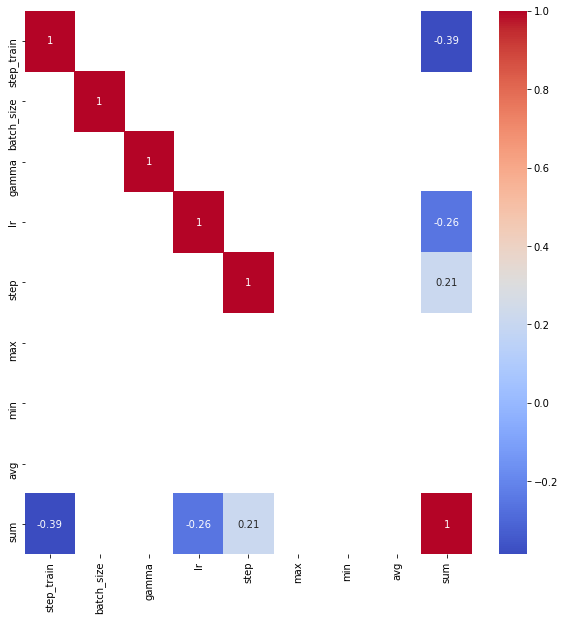

In [24]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df_DQN.corr()[abs(df_DQN.corr()) > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

#### DuelingNetwork

In [25]:
df_DoubleDQN = df[df["algo"] == "DoubleDQN"].copy()
df_DoubleDQN = df_DoubleDQN[df_DoubleDQN["network"] == "SimpleDuelingNetwork"]

In [26]:
df_DoubleDQN.sort_values(by =["sum","step"],  ascending = [False, True]).head(10)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,max,min,avg,sum
1165,DoubleDQN,1.0,32.0,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,512,100.0,1.0,1.0,1.0,500.0
2066,DoubleDQN,1.0,64.0,0.99,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,2048,200.0,1.0,1.0,1.0,500.0
2174,DoubleDQN,1.0,64.0,1.00,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,512,200.0,1.0,1.0,1.0,500.0
2258,DoubleDQN,1.0,64.0,1.00,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,2048,200.0,1.0,1.0,1.0,500.0
2270,DoubleDQN,1.0,64.0,1.00,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,512,200.0,1.0,1.0,1.0,500.0
1395,DoubleDQN,1.0,32.0,0.99,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,2048,300.0,1.0,1.0,1.0,500.0
1587,DoubleDQN,1.0,32.0,1.00,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,2048,300.0,1.0,1.0,1.0,500.0
1595,DoubleDQN,1.0,32.0,1.00,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,2048,300.0,1.0,1.0,1.0,500.0
1975,DoubleDQN,1.0,64.0,0.99,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,512,300.0,1.0,1.0,1.0,500.0
2171,DoubleDQN,1.0,64.0,1.00,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,2048,300.0,1.0,1.0,1.0,500.0


<AxesSubplot:>

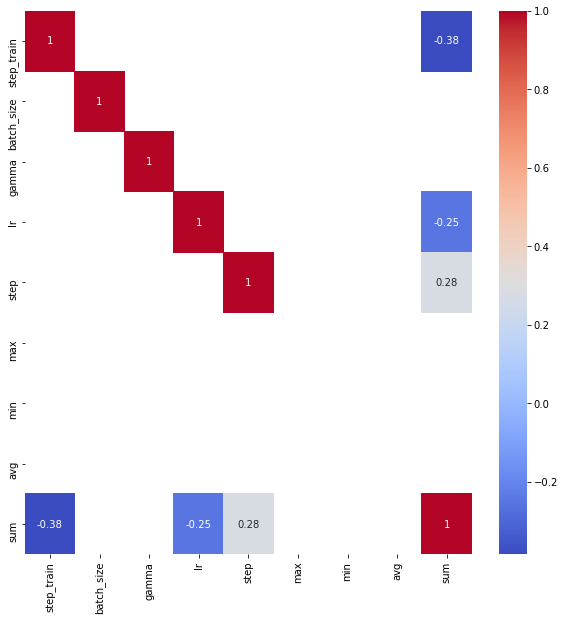

In [27]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df_DoubleDQN.corr()[abs(df_DoubleDQN.corr()) > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

### CategoricalDQN

In [28]:
df_CategoricalDQN = df[df["algo"] == "CategoricalDQN"].copy()

In [29]:
df_CategoricalDQN.sort_values(by =["sum","step"],  ascending = [False, True]).head(20)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,max,min,avg,sum
697,CategoricalDQN,32.0,32.0,0.99,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,C51Network,,Adam,0.0001,ExperienceReplay,2048,100.0,1.0,1.0,1.0,500.0
63,CategoricalDQN,1.0,32.0,0.95,EpsilonGreedy-0.1,C51Network,,Adam,0.0010,ExperienceReplay,512,300.0,1.0,1.0,1.0,281.0
543,CategoricalDQN,1.0,64.0,1.00,EpsilonGreedy-0.1,C51Network,,Adam,0.0010,ExperienceReplay,512,300.0,1.0,1.0,1.0,253.0
82,CategoricalDQN,1.0,32.0,0.95,EpsilonGreedy-0.6,C51Network,,Adam,0.0010,ExperienceReplay,2048,200.0,1.0,1.0,1.0,225.0
55,CategoricalDQN,1.0,32.0,0.95,EpsilonGreedy-0.1,C51Network,,Adam,0.0001,ExperienceReplay,512,300.0,1.0,1.0,1.0,222.0
745,CategoricalDQN,32.0,32.0,0.99,EpsilonGreedy-0.6,C51Network,,Adam,0.0001,ExperienceReplay,2048,100.0,1.0,1.0,1.0,204.0
62,CategoricalDQN,1.0,32.0,0.95,EpsilonGreedy-0.1,C51Network,,Adam,0.0010,ExperienceReplay,512,200.0,1.0,1.0,1.0,178.0
814,CategoricalDQN,32.0,32.0,1.00,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,C51Network,,Adam,0.1000,ExperienceReplay,512,200.0,1.0,1.0,1.0,164.0
466,CategoricalDQN,1.0,64.0,0.99,EpsilonGreedy-0.6,C51Network,,Adam,0.0010,ExperienceReplay,2048,200.0,1.0,1.0,1.0,161.0
513,CategoricalDQN,1.0,64.0,1.00,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,C51Network,,Adam,0.0010,ExperienceReplay,2048,100.0,1.0,1.0,1.0,153.0


<AxesSubplot:>

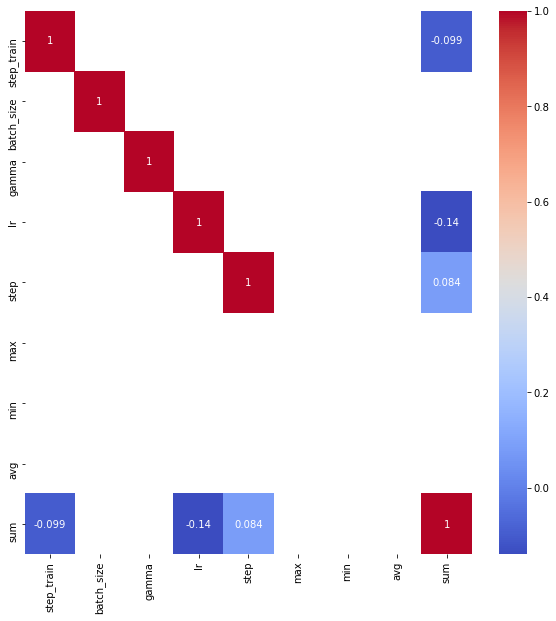

In [30]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df_CategoricalDQN.corr()[abs(df_CategoricalDQN.corr()) > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)